# Finite Difference Method for Beam Modelling

Mesh size is key here. Because you are dealing with two different dimensions (r and z) affecting eachother you need to make sure the ratio between the integrals is correct. If dz is too big, the step size will not give the opportuinity for divergence to occur in the radial direction. 

dz/k*dr**2 <<1  --> k*dr**2 >> dz --> k*dr**2 =10*dz --> dz = k*dr**2/100 

In [ ]:

import matplotlib.pyplot as plt
import cmath as m 
import numpy as np

F = 50E3
lmda = 1.064
w = 1E3
k = 2*m.pi/lmda
rpoints = 100
r = np.linspace(0,1.5*w,rpoints)
dr = r[2]-r[1]
dz = k*(dr**2)/100
zrange = 100E3 #microns
zpoints = int(zrange/dz)
z = np.linspace(0,dz*zpoints,zpoints)

Edata = np.zeros((rpoints,zpoints),dtype=complex)
Change_data = np.zeros((rpoints,zpoints),dtype=complex)

a = 2/(k*(w**2)) + 1j/F

for i in range(rpoints):
    Edata[i,0] = m.exp(-a*(r[i]**2)*k/2)

integral = abs(sum(Edata[:,0]))

for j in range(1,zpoints):
    for i in range(rpoints):
        if 0<i<rpoints-1:
            Fd = ((Edata[i+1,j-1]-Edata[i,j-1])/(dr))/r[i]
            Sd = ((Edata[i+1,j-1]-2*Edata[i,j-1]+Edata[i-1,j-1])/(dr**2))
            Edata[i,j]=Edata[i,j-1]+ ((((1j/2/k)*(Sd+Fd))*dz))
    
        
    Edata[rpoints-1,j] = Edata[rpoints-2,j]        
    Edata[0,j] = Edata[1,j]
    totalarea = abs(sum(Edata[:,j]))
    for i in range(rpoints):
        Edata[i,j] = (Edata[i,j]/totalarea)*integral

    pdone = (j/zpoints)*100
    if j%1000 == 0:
        print(pdone)
    
Edata = np.vstack((np.flipud(Edata),Edata))

plotr = np.hstack((np.flip(r*-1),r))
plt.pcolormesh(z,plotr,abs(Edata),shading='auto')



In [ ]:
plt.plot(z,abs(Edata[100,:]))

In [ ]:
np.amax(abs(Edata))

In [ ]:

for j in range(zpoints):
    for i in range(rpoints): 
        if abs(Edata[i,j])>3:
            Edata[i,j]=1.5

plt.pcolormesh(z,plotr,abs(Edata),shading='auto')   

In [ ]:
plt.plot(plotr,abs(Edata[:,60000]))

In [ ]:

import matplotlib.pyplot as plt
import cmath as m 
import numpy as np

F = 5E3
lmda = 1.064
w = 1E3
k = 2*m.pi/lmda/25
rpoints = 100
r = np.linspace(0,2E3,rpoints)
dr = r[2]-r[1]
dz = k*(dr**2)/50
zrange = 15E3 #microns
zpoints = int(zrange/dz)
z = np.linspace(0,dz*zpoints,zpoints)

Edata = np.zeros((rpoints,zpoints),dtype=complex)

a = 2/(k*(w**2)) + 1j/F
Edata[:,0] = np.exp(-a*(r**2)*k/2)



integral = sum(abs(Edata[:,0]))

for j in range(1,zpoints):
    Fd=np.gradient(Edata[1:(rpoints-1),j-1],dr)
    Sd=np.gradient(Fd,dr)
    Edata[1:(rpoints-1),j] = Edata[1:(rpoints-1),j-1] + ((1j/2/k)*(Sd+(Fd/r[1:(rpoints-1)]))*dz)
    Edata[rpoints-1,j] = Edata[rpoints-2,j]        
    Edata[0,j] = Edata[1,j]
    totalarea = sum(abs(Edata[:,j]))
    Edata[:,j] = (Edata[:,j]/totalarea)*integral

    pdone = (j/zpoints)*100
    if j%1000 == 0:
        print(pdone)
    
Edata = np.vstack((np.flipud(Edata),Edata))

plotr = np.hstack((np.flip(r*-1),r))
plt.pcolormesh(z,plotr,abs(Edata),shading='auto')



In [ ]:

import matplotlib.pyplot as plt
import cmath as m 
import numpy as np

F = 2.5E3
lmda = 1.064
w = 100#1E3
k = 2*m.pi/lmda
rpoints = 500
r = np.linspace(0.5,200,rpoints)
dr = r[2]-r[1]
dz = k*(dr**2)/100
zrange = 5E3 #microns
zpoints = int(zrange/dz)
z = np.linspace(0,dz*zpoints,zpoints)

Edata = np.zeros((rpoints,zpoints),dtype=complex)
Change_data = np.zeros((rpoints,zpoints),dtype=complex)

a = 2/(k*(w**2)) + 1j/F


Edata[:,0] = np.exp(-a*(r**2)*k/2)



integral = sum(abs(Edata[:,0]))

for j in range(1,zpoints):
    Fd=np.gradient(Edata[0:(rpoints-1),j-1],dr,edge_order=2)
    Sd=np.gradient(Fd,dr,edge_order=2)
    Edata[0:(rpoints-1),j] = Edata[0:(rpoints-1),j-1] + ((1j/2/k)*(Sd+(Fd/r[0:(rpoints-1)]))*dz)
#     Edata[rpoints-1,j] = Edata[rpoints-2,j]        
#     Edata[0,j] = Edata[1,j]
    totalarea = sum(abs(Edata[:,j]))
    Edata[:,j] = (Edata[:,j]/totalarea)*integral

    pdone = (j/zpoints)*100
    if j%1000 == 0:
        print(pdone)
    
Edata = np.vstack((np.flipud(Edata),Edata))

plotr = np.hstack((np.flip(r*-1),r))
plt.pcolormesh(z,plotr,abs(Edata),shading='auto')



In [ ]:
plt.plot(plotr,abs(Edata[:,100]))

In [ ]:
%reset


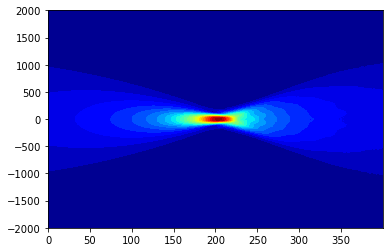

In [37]:

import matplotlib.pyplot as plt
import cmath as m 
import numpy as np

F = 200E3
lmda = 1.064
w = 1E3
k = 2*m.pi/lmda
rpoints =2**7
r = np.linspace(0,2E3,rpoints)
dr = r[2]-r[1]
dz = k*(dr**2)/100
zrange =400E3 #microns
zpoints = int(zrange/dz)
z = np.linspace(0,dz*zpoints,zpoints)

Edata = np.zeros((rpoints,zpoints),dtype=complex)

a = 2/(k*(w**2)) + 1j/F
Edata[:,0] = np.exp(-a*(r**2)*k/2)

STEP = np.zeros((rpoints,rpoints))

Enm1 = 1/(dr**2)

def En(r):
    En = -1/(r*dr) - 2/(dr**2)
    return En

def Enp1(r):
    Enp1 = 1/(r*dr) + 1/(dr**2)
    return Enp1

STEP[0,0:3]= [Enm1, En(r[1]), Enp1(r[1])]
STEP[rpoints-1,rpoints-3:rpoints]= [0,0,0]#[Enm1, En(r[rpoints-2]), Enp1(r[rpoints-2])]

for p in range(1,rpoints-2):
    STEP[p,p-1] = Enm1
    STEP[p,p] = En(r[p])
    STEP[p,p+1] = Enp1(r[p])

    


integral = sum(abs(Edata[:,0]))


for j in range(1,zpoints):
    Edata[:,j] = Edata[:,j-1] + (1j/2/k)*(STEP@Edata[:,j-1])*dz
    totalarea = sum(abs(Edata[:,j]))
    Edata[:,j] = (Edata[:,j]/totalarea)*integral

#     pdone = (j/zpoints)*100
#     if j%1000 == 0:
#         print(pdone)
    
pEdata = abs(np.vstack((np.flipud(Edata),Edata)))

plotr = (np.hstack((np.flip(r*-1),r)))
pz = z/1E3
plt.contourf(pz,plotr,pEdata, levels = 30, cmap = 'jet')
#plt.pcolormesh(pz,plotr,pEdata,shading='auto')

In [ ]:
STEP[120:128,120:128]

(-200.0, 200.0)

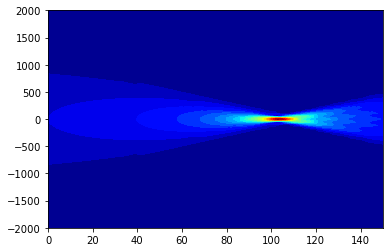

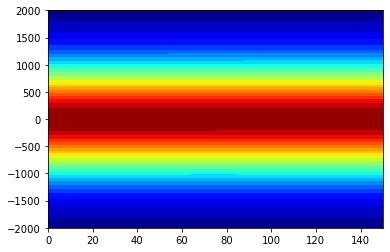

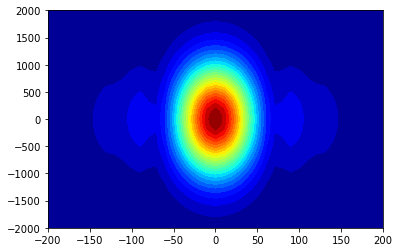

In [78]:

import matplotlib.pyplot as plt
import cmath as m 
import numpy as np

F = 100E3
lmda = 1.064
w = 1E3
k = 2*m.pi/lmda
xpoints =200
x = np.linspace(0,2E3,xpoints)
y = x
dx = x[2]-x[1]
dz = k*(dx**2)/100
zrange =150E3 #microns
zpoints = int(zrange/dz)
z = np.linspace(0,dz*zpoints,zpoints)

Edatax = np.zeros((xpoints,zpoints),dtype=complex)
Edatay = np.zeros((xpoints,zpoints),dtype=complex)

ax = 2/(k*(w**2)) + 1j/F
ay = 2/(k*(w**2)) 
Edatax[:,0] = np.exp(-ax*(x**2)*k/2)
Edatay[:,0] = np.exp(-ay*(y**2)*k/2)

STEP = np.zeros((xpoints,xpoints))

Enm1 = 1/(dx**2)
En = - 2/(dx**2)
Enp1 = 1/(dx**2)

#STEP[0,0:3]= [Enm1, En, Enp1]
STEP[0,0:3]= [En, 2*Enp1, 0]
STEP[xpoints-1,xpoints-3:xpoints]= [0,0,0]#[Enm1, En(r[rpoints-2]), Enp1(r[rpoints-2])]

for p in range(1,rpoints-2):
    STEP[p,p-1] = Enm1
    STEP[p,p] = En
    STEP[p,p+1] = Enp1
    


integral = sum(abs(Edatax[:,0]))



for j in range(1,zpoints):
    Edatax[:,j] = Edatax[:,j-1] + (1j/2/k)*(STEP@Edatax[:,j-1])*dz
    totalarea = sum(abs(Edatax[:,j]))
    Edatax[:,j] = (Edatax[:,j]/totalarea)*integral

for j in range(1,zpoints):
    Edatay[:,j] = Edatay[:,j-1] + (1j/2/k)*(STEP@Edatay[:,j-1])*dz
    totalarea = sum(abs(Edatay[:,j]))
    Edatay[:,j] = (Edatay[:,j]/totalarea)*integral

    
#     pdone = (j/zpoints)*100
#     if j%1000 == 0:
#         print(pdone)
    
pEdatax = abs(np.vstack((np.flipud(Edatax),Edatax)))
pEdatay = abs(np.vstack((np.flipud(Edatay),Edatay)))

plotx = (np.hstack((np.flip(x*-1),x)))
pz = z/1E3
plt.contourf(pz,plotx,pEdatax, levels = 30, cmap = 'jet')
plt.figure(2)
plt.contourf(pz,plotx,pEdatay, levels = 30, cmap = 'jet')
plt.figure(3)
fz = int(F/dz)
fspot = np.zeros((xpoints,xpoints))
for j in range(xpoints):
    fspot[j,:]=abs(Edatax[:,fz]*Edatay[j,fz])
fspot = np.vstack((np.flipud(fspot),fspot))
pfspot = np.hstack((np.flip(fspot),fspot))  
pfspot = pfspot/np.max(pfspot)
plt.contourf(plotx,plotx,pfspot, levels = 30, cmap = 'jet')
plt.xlim([-200,200])

#plt.pcolormesh(pz,plotr,pEdata,shading='auto')

(-400.0, 400.0)

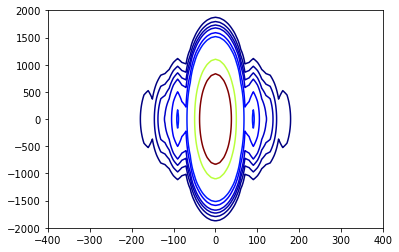

In [83]:
plt.contour(plotx,plotx,pfspot, levels = [0.03,0.04,0.05,0.06,0.08,0.1,0.3,0.5], cmap = 'jet')
plt.xlim([-400,400])

In [97]:
xdim = pfspot[xpoints,:]
ydim = pfspot[:,xpoints]

xvals=[]
yvals=[]
inpeak=0
for i in range(2*xpoints):
    check=inpeak
    if xdim[i] > 1/np.exp(2):
        inpeak=1
    else:
        inpeak=0
    if (check - inpeak)**2==1:
        xvals.append(plotx[i])

inpeak=0
for i in range(2*xpoints):
    check=inpeak
    if ydim[i] > 1/np.exp(2):
        inpeak=1
    else:
        inpeak=0
    if (check - inpeak)**2==1:
        yvals.append(plotx[i])
        
xr = (xvals[1]-xvals[0])/2000
yr = (yvals[1]-yvals[0])/2000

area = m.pi*xr*yr
print(area,'cm^2')

0.28979667088112715 cm^2


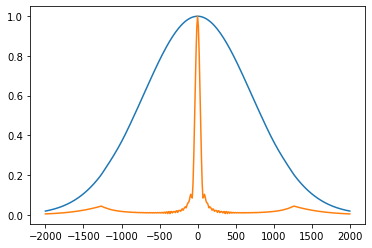

In [105]:
plt.plot(plotx,ydim)
plt.plot(plotx,xdim)
